In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../")

import pandas as pd
import os
import statsmodels.formula.api as sm

from library import regulations
from library import analysis
from library import tables

In [3]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")
data = data[data.doi == True]
regs = data[regulations.mainplus]
regs.head()

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,reg25_0811,reg25_081,reg25_0812,reg25_082,reg25_112,reg25_113,reg25_111,reg21_003,reg21_053,reg21_057,...,reg21_354,reg21_3541,reg25_092,reg37_0012,reg25_036,reg21_203,reg21_055,reg21_002,reg21_404,reg21_458
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(regs)

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
df = pd.DataFrame(pca.components_, columns=list(regs.columns))
df

,reg25_0811,reg25_081,reg25_0812,reg25_082,reg25_112,reg25_113,reg25_111,reg21_003,reg21_053,reg21_057,...,reg21_354,reg21_3541,reg25_092,reg37_0012,reg25_036,reg21_203,reg21_055,reg21_002,reg21_404,reg21_458
0,0.093493,0.256920,0.116882,0.152080,0.432253,0.423315,0.221526,0.234330,0.261322,0.267944,...,0.093716,0.141601,0.271188,0.206839,0.073070,0.073738,0.063792,0.086373,0.107193,0.120550
1,0.078819,0.413936,0.333769,0.260644,-0.471640,-0.437178,-0.194627,0.194740,0.188692,0.092109,...,0.025669,0.031588,0.107572,0.069444,0.143044,-0.016738,0.011499,0.011622,0.025346,0.042997
2,0.007688,-0.006893,-0.137730,0.113016,-0.033391,-0.073997,0.013667,-0.008029,-0.480228,-0.506301,...,0.111753,0.225989,0.256972,0.248865,0.096930,0.174303,-0.092508,0.014990,0.007456,-0.054998
3,0.074419,-0.442749,-0.075448,-0.258941,-0.038881,-0.080168,-0.097234,0.281697,0.165699,0.137570,...,0.051477,0.086486,-0.253438,-0.144340,0.171791,-0.005087,0.012902,0.070523,-0.031921,-0.009653
4,0.002964,-0.302217,-0.091601,-0.207318,-0.211611,-0.176911,-0.060143,-0.035887,0.259104,0.261799,...,0.228147,0.339685,0.190875,0.160632,-0.053350,0.152828,0.029047,0.044147,0.041003,0.090348
5,0.019146,-0.132216,0.425166,-0.103291,0.080638,0.107373,0.028540,-0.149884,-0.140487,-0.079246,...,0.134266,0.153770,-0.198980,-0.279790,-0.018755,0.062655,-0.016201,0.078477,0.008175,0.039097
6,-0.167078,0.274478,-0.508685,0.259556,0.003236,0.041549,-0.102669,-0.411912,0.079575,0.240813,...,0.051845,0.136423,-0.268701,-0.188308,0.332767,0.076332,-0.034032,-0.049918,-0.103904,-0.059939
7,-0.143559,-0.197930,0.473062,0.021427,0.035837,0.045526,-0.082321,-0.505503,-0.104324,0.148432,...,0.000331,-0.000354,-0.016171,0.323925,0.444832,-0.074565,0.052958,0.090934,0.071601,0.063915
8,0.159104,0.057243,0.286825,0.273003,0.064130,0.110784,-0.077763,0.316417,-0.098068,-0.089989,...,0.035096,0.174083,-0.387690,-0.289758,0.180064,0.153214,0.005062,0.005886,-0.133544,-0.102037
9,0.098804,-0.106840,-0.178135,-0.146424,0.043490,0.078768,-0.148885,0.336957,-0.062764,-0.060178,...,-0.094342,-0.136565,0.223522,0.041281,0.703760,-0.086238,-0.078237,-0.025145,-0.064214,-0.031980


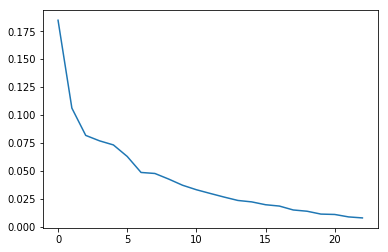

In [6]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)

In [7]:
pca = PCA(n_components=6)
pca.fit(regs)
X1=pca.fit_transform(regs)
X1 = pd.DataFrame(X1)
pca_data = X1.merge(data, left_index = True, right_index = True)
pca_data.columns
pca_data = pca_data.rename(columns = {0: 'PCA1', 1: 'PCA2', 2: 'PCA3', 3: 'PCA4', 4: 'PCA5', 5: 'PCA6'})
pca_data

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,Unnamed: 0,district,distname,year,...,charter,district_status,type_urban,type_suburban,type_town,type_rural,teachers_nodegree,teachers_badegree,teachers_msdegree,teachers_phddegree
0,0.021970,1.033928,-0.028029,0.385073,-0.671289,-0.308438,0,1902,CAYUGA ISD,yr1112,...,False,doi,0,0,0,1,0.000000,0.457439,0.062117,0.000000
1,1.014811,-0.847506,1.241802,0.123837,0.298971,-0.286498,1,1903,ELKHART ISD,yr1112,...,False,doi,0,0,1,0,0.000000,0.523077,0.108609,0.000000
2,0.798380,-0.091516,0.635914,-0.393481,-0.237375,-0.970432,2,1904,FRANKSTON ISD,yr1112,...,False,doi,0,0,0,1,0.000000,0.452648,0.095202,0.000000
3,0.326461,-0.684994,0.220833,-0.053896,-0.308090,0.479594,3,1906,NECHES ISD,yr1112,...,False,doi,0,0,0,1,0.000000,0.553633,0.017301,0.000000
4,-0.500941,-0.697485,0.161112,-0.551209,0.180336,-0.063611,4,1907,PALESTINE ISD,yr1112,...,False,doi,0,0,1,0,0.002184,0.439686,0.099342,0.002316
5,-0.120105,0.898381,0.434548,-0.636417,-0.429017,0.056141,5,1908,WESTWOOD ISD,yr1112,...,False,doi,0,0,1,0,0.000000,0.468405,0.093822,0.004691
6,1.263506,-0.619238,-0.168393,0.575030,0.506126,-0.290968,6,1909,SLOCUM ISD,yr1112,...,False,doi,0,0,0,1,0.000000,0.618001,0.025764,0.000000
9,0.752039,-0.387124,-0.050785,-0.964131,-0.485529,0.216584,9,3902,HUDSON ISD,yr1112,...,False,doi,0,0,1,0,0.005473,0.408490,0.066222,0.000000
10,0.991304,-0.582521,0.483157,0.201192,0.892695,0.797733,10,3903,LUFKIN ISD,yr1112,...,False,doi,0,0,1,0,0.003830,0.392120,0.064447,0.000000
11,0.993951,-0.597266,0.611347,-0.430225,-0.543610,-0.910310,11,3904,HUNTINGTON ISD,yr1112,...,False,doi,0,0,1,0,0.004143,0.421883,0.055185,0.000000


# Predict PCAs

In [8]:
x_list = ['type_urban', 'type_suburban', 'type_town',  
           'teachers_tenure_ave', 'teachers_turnover_ratio', 'students_teacher_ratio',
           'students_hisp', 'students_black', 'students_frpl', 'avescores']

tables.ols_to_excel(pca_data, y = 'PCA1', x_list = x_list, file = table_path + 'reg_pcas.xlsx', start_row = 4, start_col = 2)
tables.ols_to_excel(pca_data, y = 'PCA2', x_list = x_list, file = table_path + 'reg_pcas.xlsx', start_row = 4, start_col = 3)
tables.ols_to_excel(pca_data, y = 'PCA3', x_list = x_list, file = table_path + 'reg_pcas.xlsx', start_row = 4, start_col = 4)
tables.ols_to_excel(pca_data, y = 'PCA4', x_list = x_list,  file = table_path + 'reg_pcas.xlsx', start_row = 4, start_col = 5)
tables.ols_to_excel(pca_data, y = 'PCA5', x_list = x_list, file = table_path + 'reg_pcas.xlsx', start_row = 4, start_col = 6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PCA5   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9478
Date:                Sat, 20 Oct 2018   Prob (F-statistic):              0.488
Time:                        17:17:07   Log-Likelihood:                -2671.5
No. Observations:                3530   AIC:                             5363.
Df Residuals:                    3520   BIC:                             5425.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
type_urban                  0.0203      0.047      0.434      0.665      -0.071       0.112
type_suburban               0.0459      0.029      1.593      0.111      -0.011       0.102
type_town                   0.0036      0.024      0.152      0.879      -0.043       0.050
teachers_tenure_ave         0.0021      0.004      0.479      0.632      -0.007       0.011
teachers_turnover_ratio    -0.0005      0.001     -0.457      0.648      -0.003       0.002
students_teacher_ratio     -0.0008      0.007     -0.118      0.906      -0.014       0.013
students_hisp               0.0649      0.048      1.340      0.180      -0.030       0.160
students_black              0.0202      0.098      0.206      0.837      -0.172       0.212
students_frpl              -0.0724      0.075     -0.968      0.333      -0.219       0.074
avescores                  -0.0190      0.018     -1.046      0.295      -0.055       0.017
==============================================================================
Omnibus:                       70.488   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.760
Skew:                           0.309   Prob(JB):                     7.90e-18
Kurtosis:                       3.392   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""